In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from cdlib import algorithms

In [2]:
edges_df = pd.read_csv("../data/edgelist_2011.csv")
nodes_df = pd.read_csv("../data/nodelist_2011.csv")

In [11]:
def create_graph(edges_df: pd.DataFrame, nodes_df: pd.DataFrame):
    net = nx.Graph()
    nodes = []
    for i, row in nodes_df.iterrows():
        nodes.append((row["country_iso3"], {"label": row["country_iso3"],"gdp_us_dollar": row["gdp_us_dollar"]}))
    net.add_nodes_from(nodes)
    
    for i, row in edges_df.iterrows():
        net.add_edge(row["source"], row["target"], weight = row["weight"])
    return net

In [12]:
net = create_graph(edges_df, nodes_df)

In [16]:
import community as community_louvain
partition = community_louvain.best_partition(net)
partition = community_louvain.best_partition(net)

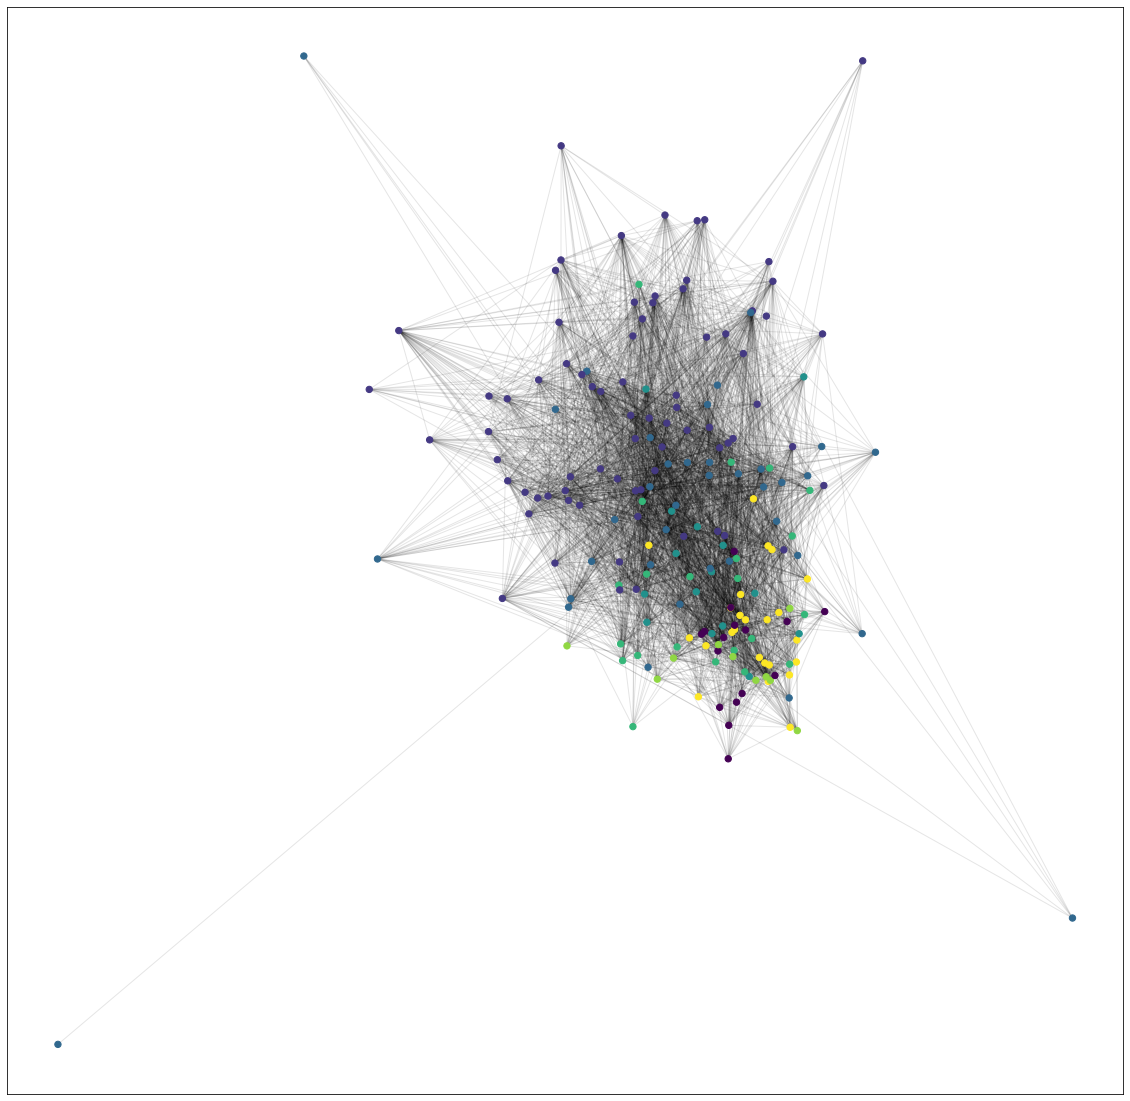

In [19]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(net)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(net, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(net, pos, alpha=0.1)
plt.show()